In [4]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

In [6]:
train_df = pd.read_csv("data/Completedataset_Train.csv")
valid_df = pd.read_csv("data/Completedataset_Test.csv")

In [7]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,35,4,5,7,8,9,10,10,10,2,...,9,9,10,10,11,11,8,8,10,11
1,1,11,13,17,20,21,20,18,17,20,...,40,25,16,20,11,15,14,15,16,18
2,30,17,8,4,11,20,20,12,6,15,...,13,13,14,13,13,13,11,12,15,17
3,18,11,13,15,15,13,12,12,13,20,...,10,9,7,6,5,4,7,5,6,11
4,1,10,12,16,19,20,19,17,16,13,...,12,17,19,16,15,17,15,16,17,18


In [8]:
y_train=train_df['label']
y_valid=valid_df['label']
del train_df['label']
del valid_df['label']

In [9]:
x_train=train_df.values
x_valid=valid_df.values

In [10]:
x_train.shape

(33600, 784)

In [11]:
y_train.shape

(33600,)

In [12]:
x_valid.shape

(8400, 784)

In [13]:
y_valid.shape

(8400,)

In [14]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


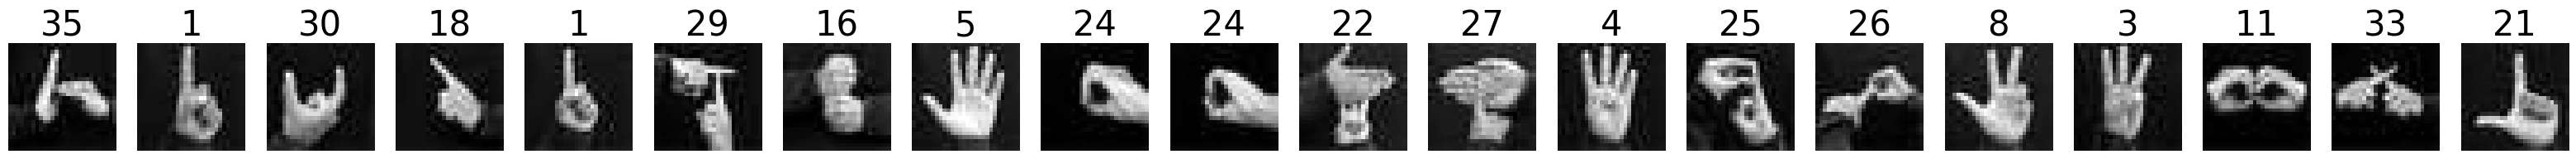

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images=20
for i in range(num_images):
    row=x_train[i]
    label=y_train[i]
    
    image=row.reshape(28, 28)
    plt.subplot(1,num_images,i+1)
    plt.title(label, fontdict={'fontsize':30})
    plt.axis('off')
    plt.imshow(image,cmap='gray')

In [16]:
x_train.min()

np.int64(0)

In [17]:
x_train.max()

np.int64(235)

In [18]:
x_train=x_train/255
x_valid=x_valid/255

In [19]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
import tensorflow as tf
import tensorflow.keras as keras
num_categories = 36

In [21]:
import tensorflow
y_train=tensorflow.keras.utils.to_categorical(y_train,num_categories)
y_valid=tensorflow.keras.utils.to_categorical(y_valid,num_categories)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [23]:
from tensorflow.keras.layers import Dense, Flatten

# model = Sequential()
# model.add(Flatten(input_shape=(28, 28, 1)))  
# model.add(Dense(units=512, activation='relu'))
# model.add(Dense(units=512, activation='relu'))
# model.add(Dense(units=num_categories, activation='softmax'))

In [24]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28, 28, 1]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))  # Adding dropout for regularization
model.add(tf.keras.layers.Dense(units=num_categories, activation='softmax'))


/Users/chhaviverma/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 228,388 (892.14 KB)

 Trainable params: 228,388 (892.14 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
x_train_reshaped = x_train.reshape(-1, 28, 28, 1)
x_valid_reshaped = x_valid.reshape(-1, 28, 28, 1)
history = model.fit(x_train_reshaped, y_train, epochs=20, validation_data=(x_valid_reshaped, y_valid))

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.7535 - loss: 0.8755 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9912 - loss: 0.0256 - val_accuracy: 1.0000 - val_loss: 1.9486e-04
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9922 - loss: 0.0224 - val_accuracy: 1.0000 - val_loss: 3.5266e-06
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9961 - loss: 0.0120 - val_accuracy: 1.0000 - val_loss: 8.3557e-07
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9966 - loss: 0.0110 - val_accuracy: 1.0000 - val_loss: 5.5802e-06
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9964 - loss: 0.0104 - val_accuracy: 1.0000 - val_loss: 4.5069e-07
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9976 - loss: 0.0064 - val_accuracy: 1.0000 - val_loss: 1.1121e-05
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/s

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=False,
)

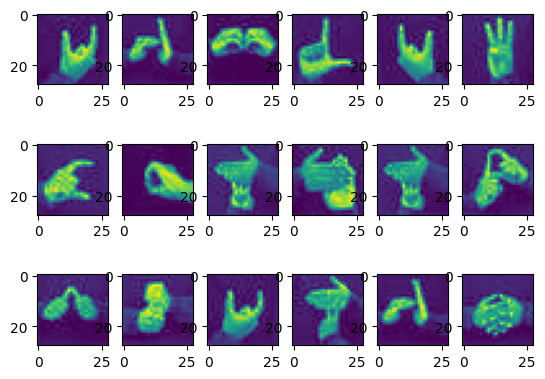

In [30]:
import matplotlib.pyplot as plt
import numpy as np
batch_size=18

x_train_reshaped = x_train.reshape(-1, 28, 28, 1)
x_valid_reshaped = x_valid.reshape(-1, 28, 28, 1)

img_iter=datagen.flow(x_train_reshaped,y_train,batch_size=batch_size)

x, y = next(img_iter)
fig, ax=plt.subplots(nrows=3,ncols=6)
for i in range(batch_size):
    image=x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [31]:
datagen.fit(x_train_reshaped)

In [32]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
x_train_reshaped = x_train_reshaped.astype('float32')
x_train_reshaped /= 255

model.fit(img_iter,
         epochs=20,
         steps_per_epoch=len(x_train_reshaped)//batch_size,
         validation_data=(x_valid_reshaped,y_valid))

# model.fit(datagen.flow(x_train_reshaped, y_train, batch_size=batch_size),
#          epochs=20,
#          steps_per_epoch=len(x_train_reshaped) // batch_size,
#          validation_data=(x_valid_reshaped, y_valid))

Epoch 1/20


/Users/chhaviverma/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1866/1866 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8946 - loss: 0.8441 - val_accuracy: 1.0000 - val_loss: 2.1511e-07
Epoch 2/20
   1/1866 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 1.0000 - loss: 2.4633e-04

/Users/chhaviverma/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1866/1866 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - accuracy: 1.0000 - loss: 2.4633e-04 - val_accuracy: 1.0000 - val_loss: 2.1759e-07
Epoch 3/20
1866/1866 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9955 - loss: 0.0140 - val_accuracy: 1.0000 - val_loss: 4.5015e-08
Epoch 4/20
1866/1866 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - accuracy: 1.0000 - loss: 6.9935e-06 - val_accuracy: 1.0000 - val_loss: 4.5043e-08
Epoch 5/20
1866/1866 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9966 - loss: 0.0097 - val_accuracy: 1.0000 - val_loss: 3.5905e-09
Epoch 6/20
1866/1866 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 1.0000 - loss: 0.0394 - val_accuracy: 1.0000 - val_loss: 3.0086e-09
Epoch 7/20
1866/1866 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9983 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss: 3.1221e-10
Epoch 8/20
1866/1866 ━━━━━━━━━━━━━━━━━━━━ 1s 530us/step - accuracy: 1.0000 - loss: 2.8478e-07 - val_accuracy: 1.0000 - val_loss: 3.1221e-10
Epoch 9/20
1866/1866 ━━━━━━━━━━━━━━━━━━━━ 19s 10m

In [35]:
model.save("asl_model.h5")

In [37]:
from tensorflow import keras

model = keras.models.load_model("asl_model.h5")

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 228,390 (892.15 KB)

 Trainable params: 228,388 (892.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image=mpimg.imread(image_path)
    plt.imshow(image,cmap='gray')

In [40]:
# from tensorflow.keras.preprocessing import image as image_utils

# def load_and_scale_image(image_path):
#     image = image_utils.load_img(image_path, color_mode="grayscale", target_size=(28,28))
#     return image

import cv2

def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, color_mode="grayscale", target_size=(28, 28))
    image_array = image_utils.img_to_array(image)
    
    # Convert the image array to uint8
    image_array = image_array.astype('uint8')
    
    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(image_array, (5, 5), 0)
    
    # Apply adaptive thresholding to create a binary mask
    _, thresholded_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return thresholded_image



In [41]:
alphabet = "0123456789abcdefghijklmnopqrstuvwxyz"
dictionary = {}
for i in range(36):
    dictionary[i] = alphabet[i]
dictionary

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'a',
 11: 'b',
 12: 'c',
 13: 'd',
 14: 'e',
 15: 'f',
 16: 'g',
 17: 'h',
 18: 'i',
 19: 'j',
 20: 'k',
 21: 'l',
 22: 'm',
 23: 'n',
 24: 'o',
 25: 'p',
 26: 'q',
 27: 'r',
 28: 's',
 29: 't',
 30: 'u',
 31: 'v',
 32: 'w',
 33: 'x',
 34: 'y',
 35: 'z'}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


'2'

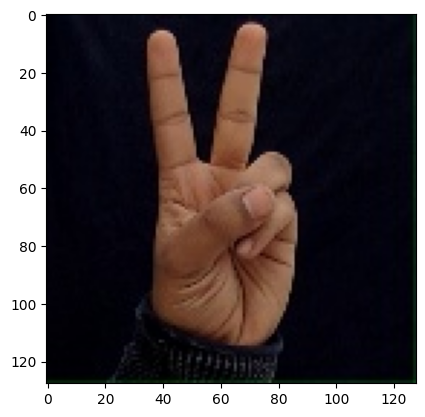

In [ ]:
from tensorflow.keras.preprocessing import image as image_utils

def predict_letter(file_path):
    # Show image
    show_image(file_path)
    # Load and scale image
    image = load_and_scale_image(file_path)
    # Convert to array
    image = image_utils.img_to_array(image)
    # Reshape image
    image = image.reshape(1,28,28,1)
    # Normalize image
    image = image / 255
    # Make prediction
    prediction = model.predict(image)
    # Convert prediction to letter
    predicted_letter = dictionary[np.argmax(prediction)]
    # Return prediction
    return predicted_letter   
predict_letter("data/ISL-A/0.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


'1'

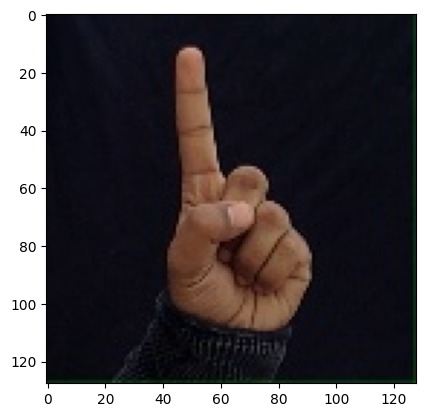

In [46]:
def predict_letter(file_path):
    # Show image
    show_image(file_path)
    # Load and scale image
    image = load_and_scale_image(file_path)
    # Convert to array
    image = image_utils.img_to_array(image)
    # Reshape image
    image = image.reshape(1,28,28,1)
    # Normalize image
    image = image / 255
    # Make prediction
    prediction = model.predict(image)
    # Convert prediction to letter
    predicted_letter = dictionary[np.argmax(prediction)]
    # Return prediction
    return predicted_letter   
predict_letter("data/ISL-A/1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


'a'

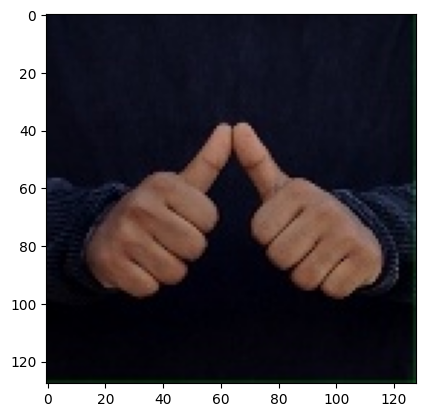

In [47]:
def predict_letter(file_path):
    # Show image
    show_image(file_path)
    # Load and scale image
    image = load_and_scale_image(file_path)
    # Convert to array
    image = image_utils.img_to_array(image)
    # Reshape image
    image = image.reshape(1,28,28,1)
    # Normalize image
    image = image / 255
    # Make prediction
    prediction = model.predict(image)
    # Convert prediction to letter
    predicted_letter = dictionary[np.argmax(prediction)]
    # Return prediction
    return predicted_letter   
predict_letter("data/ISL-A/a.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


'c'

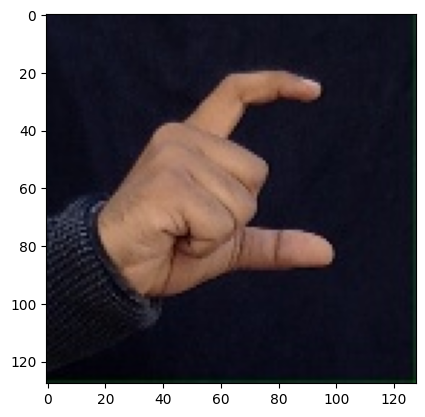

In [48]:
def predict_letter(file_path):
    # Show image
    show_image(file_path)
    # Load and scale image
    image = load_and_scale_image(file_path)
    # Convert to array
    image = image_utils.img_to_array(image)
    # Reshape image
    image = image.reshape(1,28,28,1)
    # Normalize image
    image = image / 255
    # Make prediction
    prediction = model.predict(image)
    # Convert prediction to letter
    predicted_letter = dictionary[np.argmax(prediction)]
    # Return prediction
    return predicted_letter   
predict_letter("data/ISL-A/c.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


'l'

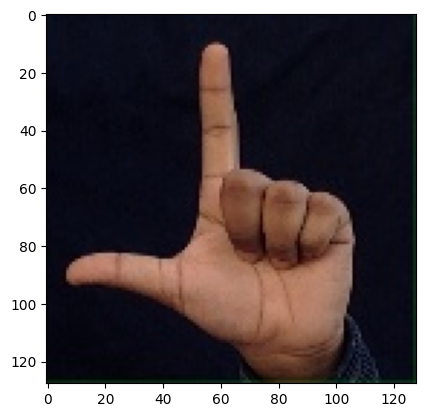

In [49]:
def predict_letter(file_path):
    # Show image
    show_image(file_path)
    # Load and scale image
    image = load_and_scale_image(file_path)
    # Convert to array
    image = image_utils.img_to_array(image)
    # Reshape image
    image = image.reshape(1,28,28,1)
    # Normalize image
    image = image / 255
    # Make prediction
    prediction = model.predict(image)
    # Convert prediction to letter
    predicted_letter = dictionary[np.argmax(prediction)]
    # Return prediction
    return predicted_letter   
predict_letter("data/ISL-A/l.jpg")